
===== SMART TRAFFIC CONTROL SYSTEM =====
1. Predict green light time
2. Predict jam level after 10–15 minutes
3. Predict peak vs non-peak hour
4. Show Traffic Volume vs Jam Graph
5. Show Jam Level vs Green Light Time Graph
6. Show Correlation Heatmap
7. Exit


Enter choice:  3
Enter number of vehicles:  100
Enter current jam level (0–100):  100
Enter current hour (0–23):  10



This is Peak Hour 🚦 (High Traffic Probability)

===== SMART TRAFFIC CONTROL SYSTEM =====
1. Predict green light time
2. Predict jam level after 10–15 minutes
3. Predict peak vs non-peak hour
4. Show Traffic Volume vs Jam Graph
5. Show Jam Level vs Green Light Time Graph
6. Show Correlation Heatmap
7. Exit


Enter choice:  1
Enter number of vehicles:  100
Enter current jam level (0–100):  99
Special vehicle? 1=Ambulance, 2=Fire Truck, 3=Police, 0=None :  1



Predicted Green Light Time: 43 seconds

===== SMART TRAFFIC CONTROL SYSTEM =====
1. Predict green light time
2. Predict jam level after 10–15 minutes
3. Predict peak vs non-peak hour
4. Show Traffic Volume vs Jam Graph
5. Show Jam Level vs Green Light Time Graph
6. Show Correlation Heatmap
7. Exit


Enter choice:  2
Enter number of vehicles:  100
Enter current jam level (0–100):  100



Predicted Jam Level in 10–15 minutes: 100

===== SMART TRAFFIC CONTROL SYSTEM =====
1. Predict green light time
2. Predict jam level after 10–15 minutes
3. Predict peak vs non-peak hour
4. Show Traffic Volume vs Jam Graph
5. Show Jam Level vs Green Light Time Graph
6. Show Correlation Heatmap
7. Exit


Enter choice:  3
Enter number of vehicles:  20
Enter current jam level (0–100):  35
Enter current hour (0–23):  13



This is Peak Hour 🚦 (High Traffic Probability)

===== SMART TRAFFIC CONTROL SYSTEM =====
1. Predict green light time
2. Predict jam level after 10–15 minutes
3. Predict peak vs non-peak hour
4. Show Traffic Volume vs Jam Graph
5. Show Jam Level vs Green Light Time Graph
6. Show Correlation Heatmap
7. Exit


Enter choice:  4


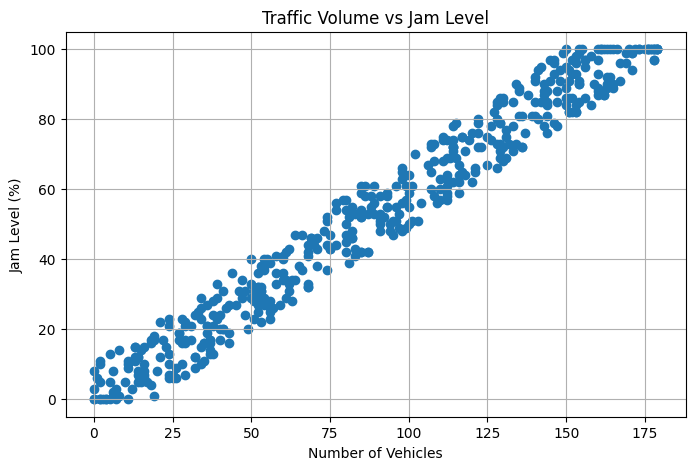


===== SMART TRAFFIC CONTROL SYSTEM =====
1. Predict green light time
2. Predict jam level after 10–15 minutes
3. Predict peak vs non-peak hour
4. Show Traffic Volume vs Jam Graph
5. Show Jam Level vs Green Light Time Graph
6. Show Correlation Heatmap
7. Exit


Enter choice:  5


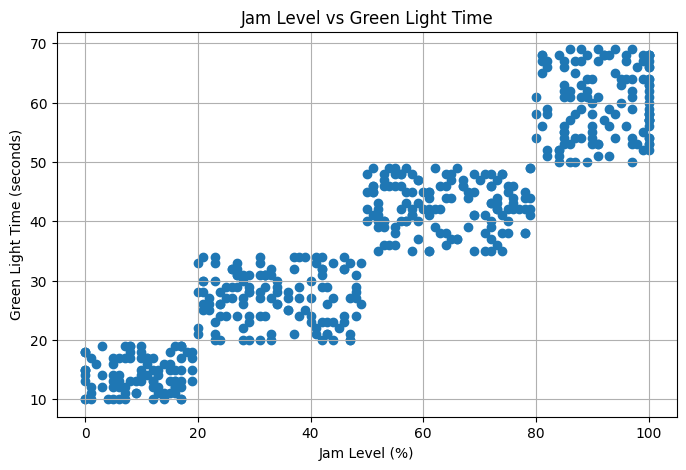


===== SMART TRAFFIC CONTROL SYSTEM =====
1. Predict green light time
2. Predict jam level after 10–15 minutes
3. Predict peak vs non-peak hour
4. Show Traffic Volume vs Jam Graph
5. Show Jam Level vs Green Light Time Graph
6. Show Correlation Heatmap
7. Exit


Enter choice:  6


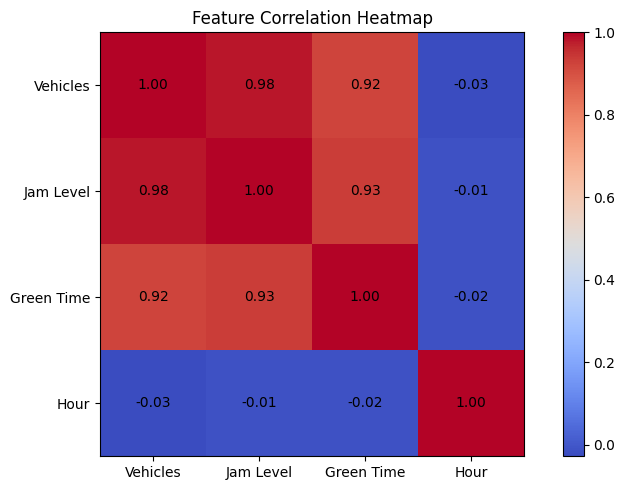


===== SMART TRAFFIC CONTROL SYSTEM =====
1. Predict green light time
2. Predict jam level after 10–15 minutes
3. Predict peak vs non-peak hour
4. Show Traffic Volume vs Jam Graph
5. Show Jam Level vs Green Light Time Graph
6. Show Correlation Heatmap
7. Exit


Enter choice:  7


Exiting...


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv("traffic_data.csv")


X = df[["number_of_vehicles", "jam_level"]]
y_green = df["green_light_time"]


y_future_jam = df["jam_level"].clip(0, 100)


df["peak"] = df["hour"].apply(lambda x: 1 if x in [7,8,9,10,17,18,19,20] else 0)


X_train, X_test, y_green_train, y_green_test = train_test_split(
    X, y_green, test_size=0.2, random_state=42
)

_, _, y_future_train, y_future_test = train_test_split(
    X, y_future_jam, test_size=0.2, random_state=42
)



data_peak = pd.DataFrame({
    "number_of_vehicles": [10, 30, 50, 80, 100, 120, 150, 200, 250, 300],
    "jam_level": [10, 20, 30, 50, 60, 70, 80, 85, 90, 95],
    "hour": [6, 7, 8, 9, 17, 18, 19, 20, 21, 22]  # realistic peak timings
})

data_peak["is_peak_hour"] = [
    1, 1, 1, 1,     
    1, 1, 1,        
    0, 0, 0         
]


X_peak = data_peak[["number_of_vehicles", "jam_level", "hour"]]
y_peak = data_peak["is_peak_hour"]



green_model = LinearRegression()
green_model.fit(X_train, y_green_train)

future_jam_model = LinearRegression()
future_jam_model.fit(X_train, y_future_train)

peak_model = LogisticRegression()
peak_model.fit(X_peak, y_peak)



def adjust_for_priority(time, vehicle_type):
    if vehicle_type == "1":   # Ambulance
        return max(10, time +20)
    elif vehicle_type == "2": # Fire Truck
        return max(10, time +20)
    elif vehicle_type == "3": # Police
        return max(10, time +20)
    return time


def graph_traffic_vs_jam(df):
    plt.figure(figsize=(8,5))
    plt.scatter(df["number_of_vehicles"], df["jam_level"])
    plt.title("Traffic Volume vs Jam Level")
    plt.xlabel("Number of Vehicles")
    plt.ylabel("Jam Level (%)")
    plt.grid(True)
    plt.show()

def graph_jam_vs_green(df):
    plt.figure(figsize=(8,5))
    plt.scatter(df["jam_level"], df["green_light_time"])
    plt.title("Jam Level vs Green Light Time")
    plt.xlabel("Jam Level (%)")
    plt.ylabel("Green Light Time (seconds)")
    plt.grid(True)
    plt.show()

def graph_correlation(df):
    corr = df[["number_of_vehicles", "jam_level", "green_light_time", "hour"]].corr()

    plt.figure(figsize=(8,5))
    plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
    plt.title("Feature Correlation Heatmap")
    plt.colorbar()

    labels = ["Vehicles", "Jam Level", "Green Time", "Hour"]
    plt.xticks(range(len(labels)), labels)
    plt.yticks(range(len(labels)), labels)

    for i in range(len(corr)):
        for j in range(len(corr)):
            plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                     ha="center", va="center", color="black")

    plt.tight_layout()
    plt.show()

def menu():
    while True:
        print("\n===== SMART TRAFFIC CONTROL SYSTEM =====")
        print("1. Predict green light time")
        print("2. Predict jam level after 10–15 minutes")
        print("3. Predict peak vs non-peak hour")
        print("4. Show Traffic Volume vs Jam Graph")
        print("5. Show Jam Level vs Green Light Time Graph")
        print("6. Show Correlation Heatmap")
        print("7. Exit")
        choice = input("Enter choice: ")

        if choice == "1":
            vehicles = int(input("Enter number of vehicles: "))
            jam = int(input("Enter current jam level (0–100): "))
            data = pd.DataFrame([[vehicles, jam]], columns=["number_of_vehicles", "jam_level"])
            vehicle_type = input(
                "Special vehicle? 1=Ambulance, 2=Fire Truck, 3=Police, 0=None : "
            )

            predicted = green_model.predict(data)[0]
            final = adjust_for_priority(predicted, vehicle_type)

            print(f"\nPredicted Green Light Time: {int(final)} seconds")

        elif choice == "2":
            vehicles = int(input("Enter number of vehicles: "))
            jam = int(input("Enter current jam level (0–100): "))
            data = pd.DataFrame([[vehicles, jam]], columns=["number_of_vehicles", "jam_level"])

            future_jam = future_jam_model.predict(data)[0]
            print(f"\nPredicted Jam Level in 10–15 minutes: {int(future_jam)}")

        elif choice == "3":
            vehicles = int(input("Enter number of vehicles: "))
            jam = int(input("Enter current jam level (0–100): "))
            hour = int(input("Enter current hour (0–23): "))
    
            data = pd.DataFrame([[vehicles, jam, hour]],
                                columns=["number_of_vehicles", "jam_level", "hour"])

            peak = peak_model.predict(data)[0]

            if peak == 1:
                print("\nThis is Peak Hour 🚦 (High Traffic Probability)")
            else:
                print("\nThis is Non-Peak Hour 🟢 (Normal Traffic Load)")

        elif choice == "4":
            graph_traffic_vs_jam(df)

        elif choice == "5":
            graph_jam_vs_green(df)

        elif choice == "6":
            graph_correlation(df)
        elif choice == "7":
            print("Exiting...")
            break

        else:
            print("Invalid choice. Try again.")

menu()
